In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
data = pd.read_csv('train_and_test2.csv')

In [3]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
Passengerid    1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Sex            1309 non-null int64
sibsp          1309 non-null int64
zero           1309 non-null int64
zero.1         1309 non-null int64
zero.2         1309 non-null int64
zero.3         1309 non-null int64
zero.4         1309 non-null int64
zero.5         1309 non-null int64
zero.6         1309 non-null int64
Parch          1309 non-null int64
zero.7         1309 non-null int64
zero.8         1309 non-null int64
zero.9         1309 non-null int64
zero.10        1309 non-null int64
zero.11        1309 non-null int64
zero.12        1309 non-null int64
zero.13        1309 non-null int64
zero.14        1309 non-null int64
Pclass         1309 non-null int64
zero.15        1309 non-null int64
zero.16        1309 non-null int64
Embarked       1307 non-null float64
zero.17     

In [5]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [6]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [7]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [8]:
# remove zero columns 
zero = ['zero.'+str(i)for i in range(1,19)]
zero

['zero.1',
 'zero.2',
 'zero.3',
 'zero.4',
 'zero.5',
 'zero.6',
 'zero.7',
 'zero.8',
 'zero.9',
 'zero.10',
 'zero.11',
 'zero.12',
 'zero.13',
 'zero.14',
 'zero.15',
 'zero.16',
 'zero.17',
 'zero.18']

In [9]:
data=data.drop(zero, axis = 1)

In [10]:
data=data.drop(['zero'], axis = 1)

In [11]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [14]:
# 2missing values in Embarked  - will drop two missing rows as it is only 2 
data['Embarked'].value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [15]:
data.shape

(1309, 9)

In [16]:
data.dropna(axis ='rows', inplace = True)

In [17]:
data.shape

(1307, 9)

In [18]:
# check if null data is gone 
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64

In [19]:
# drop 'Passengerid as it is not needed for the prediction
data.drop('Passengerid', axis =1, inplace =True)

In [20]:
type(data)

pandas.core.frame.DataFrame

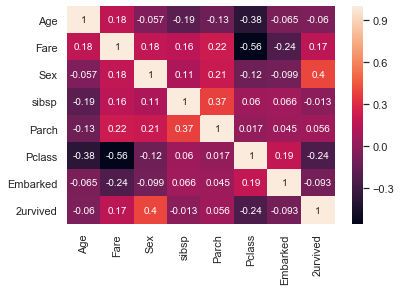

In [21]:
# check correlation of the features - Fare and Pclass has a bit of correlation 
corr_matrix=data.corr()
sns.heatmap(corr_matrix, annot = True)

In [22]:
# compare Pclass and Fare - There is big differences in Fare depends on Pclass so drop 'Fare' 
data.groupby('Pclass')['Fare'].mean()

Pclass
1    87.555777
2    21.179196
3    13.304513
Name: Fare, dtype: float64

In [23]:
data.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [37]:
data['Survived'] = data['2urvived']


In [40]:
data.drop('2urvived', axis =1).head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [41]:
# if the class number is higher , chance of survival is higher  
data.groupby('Pclass')['Survived'].size()

Pclass
1    321
2    277
3    709
Name: Survived, dtype: int64

In [42]:
# check which factor has an impact on Survived  - Fare, Sex, Pclass have great impacts on Survived 
for i in data.columns.values:
    print(data.groupby('Survived')[i].mean())
    


Survived
0    29.931748
1    28.163735
Name: Age, dtype: float64
Survived
0    27.935586
1    48.209498
Name: Fare, dtype: float64
Survived
0    0.240951
1    0.679412
Name: Sex, dtype: float64
Survived
0    0.507756
1    0.476471
Name: sibsp, dtype: float64
Survived
0    0.356774
1    0.467647
Name: Parch, dtype: float64
Survived
0    2.416753
1    1.955882
Name: Pclass, dtype: float64
Survived
0    1.537746
1    1.364706
Name: Embarked, dtype: float64
Survived
0    0
1    1
Name: 2urvived, dtype: int64
Survived
0    0
1    1
Name: Survived, dtype: int64


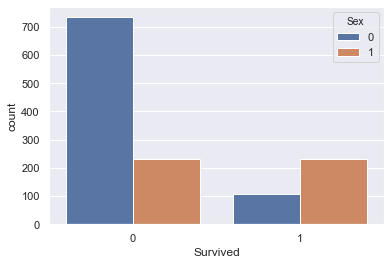

In [43]:
# visualization(Survived vs Sex): a lot of Sex 0 died and there are more sex 1 in the survived people
# not sure which number is female and male...
sns.countplot(x = 'Survived', hue = 'Sex', data = data)

In [44]:
# to work with data which has great impact on survival, take only Sex and Pclass
data_final=data.loc[: , ('Sex','Pclass','Survived')]
data_final.head()

,Sex,Pclass,Survived
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [45]:
# divide independent variable and target variable 
X = data.iloc[:, :2]
y = data.iloc[:, -1]

In [46]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [47]:
# scale the features 

scal = StandardScaler()
# scale X
scal.fit_transform(X)

array([[-0.58026066, -0.50183865],
       [ 0.66229729,  0.7360229 ],
       [-0.26962117, -0.48878987],
       ...,
       [ 0.70112723, -0.50183865],
       [-0.11430143, -0.48637343],
       [-0.11430143, -0.20977212]])

In [49]:
# split train and test set 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.3, random_state = 17)

In [52]:
# fit our train data in Logistics Regression

logit = LogisticRegression()
logit = logit.fit(train_X, train_y)

C:\Users\yunmi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
prediction = logit.predict(test_X)

In [54]:
accuracy_score(test_y, prediction)

0.7175572519083969

In [56]:
rf = RandomForestClassifier(n_estimators = 10 , n_jobs = -1, random_state =42, class_weight = 'balanced')
rf = rf.fit(train_X,train_y)


In [57]:
pre = rf.predict(test_X)

In [58]:
# lower tha logistics.. 
accuracy_score(test_y,pre)

0.6844783715012722

In [74]:
confusion_matrix(test_y, prediction)

array([[279,   9],
       [102,   3]], dtype=int64)

In [182]:
# RandomForest
confusion_matrix(test_y, pre)

array([[208,  80],
       [ 39,  66]], dtype=int64)

As for this data Logistic model shows better accuracy